In [4]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

population_salary=pd.read_csv("../../data/Salaries.csv")

# The percentile bootstrap confidence intervals

We introduce here a different version of the bootstrap confidence interval. Although it is very popular, it is based on more assumptions. Here we assume that the sampling distribution for $\hat\theta$ is known and that it is *symmetric* around $\theta$; see below.

<img align="center" src="./middle90sym.jpg" width="400"/>

Then, $U_1-\theta=\theta-L_1=W$ (reflecting the width of this distribution). From the picture above, with probability 0.90:

$$|\hat\theta-\theta|\leq W$$

leading to 

$$\hat\theta-W\leq \theta\leq \hat\theta+W$$

We call $[ \hat\theta-W, \hat\theta+W]$ a *90\% confidence interval*.
This can be approximated by $[L_1,U_1]$ and we call this a 90\% confidence interval.

It leads to the following procedure for obtaining a confidence interval:
- use bootstrap to obtain an estimate of the sampling distribution of $\hat\theta$.
- from the bootstrap distribution calculate the empirical percentiles $L_1^b$ and $U_1^b$
- $[L_1^b,U_1^b]$ is called **a percentile bootstrap CI**.

We will illustrate this with the salary data - let's assume that the interest now is on the population mean (the average salary of the City of Chicago employees).

In [8]:
# the parameter of interest
theta=population_salary['Annual Salary'].mean()

np.random.seed(3322)

# this is a SRS of size n=80
sample_salary=population_salary.sample(80,replace=False)

#the average salary in the sample
theta_hat=sample_salary['Annual Salary'].mean()

[theta,theta_hat]

[100382.64415185717, 97993.725]

Above, we calculate the average salary in the population ($\$100,382.6$) and in a simple random sample of size 80 ($\$97,993.7$). Below, we define a function that is very similar to the one introduced in the previous section, that generates bootstrap means needed for the approximation of the sampling distribution.

In [15]:
def bootstrap_mean(original_sample, label, replications):
    """Simulate sample means:
    original_sample: df containing the original sample data
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample means
    """
    means = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample(len(original_sample),replace=True)
        resampled_mean = bootstrap_sample['Annual Salary'].mean()
        means = np.append(means, resampled_mean)
        
    return means


In [17]:
bstrap_means = bootstrap_mean(sample_salary, 'Annual.Salary', 1000)

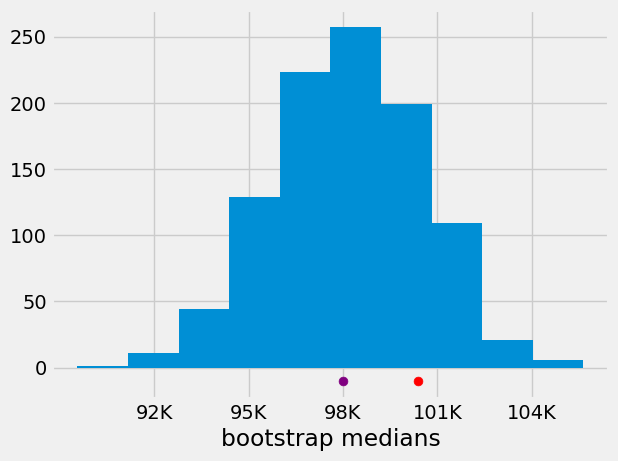

In [29]:
plt.hist(bstrap_means)
plt.scatter(theta_hat, -10, color='purple', s=40)
plt.scatter(theta, -10, color='red', s=40)
plt.xticks(ticks=[92000,95000,98000,101000,104000], labels=["92K","95K","98K","101K","104K"])
plt.xlabel("bootstrap medians");

The above histogram is our approximation for the sampling distribution of $\hat\theta$. The purple dot is the location of the average salary in our sample, and the red dot is the location of the average salary in the population.

In [33]:
left = np.percentile(bstrap_means, 2.5)
right = np.percentile(bstrap_means,97.5)

# a 95% CI
print([left,right])

[93339.230625, 102538.108125]


The 95% confidence interval for the average salary in the city of Chicago is [93,339.2, 102,538.1].

```{raw} html
<!-- NEW_TERMS_START -->
<div style="border-left:6px solid #800000; background: rgba(255,255,255,0.06) !important; box-shadow:none !important; padding:1rem; border-radius:10px; margin:1rem 0;">
  <div style="display:flex; align-items:center; gap:.6rem; margin-bottom:.6rem;">
    <span style="display:inline-block; font-weight:700; padding:.25rem .6rem; border:1px solid #800000; border-radius:.5rem; background:rgba(128,0,0,.25); color:inherit;">
      New in This Chapter
    </span>
  </div>

  <div style="display:grid; grid-template-columns:repeat(auto-fit,minmax(240px,1fr)); gap:1.25rem; align-items:start;">
    
        <div>
          <h4 style="margin:.25rem 0 .4rem; font-size:1rem; font-weight:700;">
            <span style="border-bottom:2px solid rgba(128,0,0,.55); padding-bottom:2px;">Terms</span>
          </h4>
          <ul style="margin:0; padding-left:1.2rem;">
            <li><a href="../../glossary.html#confidence-interval" style="color:inherit; text-decoration:underline;">Confidence Interval</a></li><li><a href="../../glossary.html#estimation" style="color:inherit; text-decoration:underline;">Estimation</a></li><li><a href="../../glossary.html#parameter" style="color:inherit; text-decoration:underline;">Parameter</a></li><li><a href="../../glossary.html#percentile-bootstrap-confidence-interval" style="color:inherit; text-decoration:underline;">Percentile Bootstrap Confidence Interval</a></li>
          </ul>
        </div>
        
        <div>
          <h4 style="margin:.25rem 0 .4rem; font-size:1rem; font-weight:700;">
            <span style="border-bottom:2px solid rgba(128,0,0,.55); padding-bottom:2px;">Code</span>
          </h4>
          <ul style="margin:0; padding-left:1.2rem;">
            <li><a href="../../code-glossary.html#normppf" style="color:inherit; text-decoration:underline;">norm.ppf()</a></li><li><a href="../../code-glossary.html#nppercentile" style="color:inherit; text-decoration:underline;">np.percentile()</a></li>
          </ul>
        </div>
        
  </div>
</div>
<!-- NEW_TERMS_END -->
```
